# Step 1: Problem Satement

# Step 2: Data Gathering

In [1]:
import pandas as pd
import numpy as np 
from random import randint
from scipy import stats
import os

#for date time
import datetime
from datetime import datetime as dt

# for data visualization 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px
from plotly.offline import plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# to disable warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
folder=r'C:\dec_end\ml_project\Classification\forest_fire_brazil\Dataset'
file=r'amazon.csv'
path=os.path.join(folder,file)
path

'C:\\dec_end\\ml_project\\Classification\\forest_fire_brazil\\Dataset\\amazon.csv'

In [4]:
data=pd.read_csv(path,delimiter=',', encoding = "ISO-8859-1") 
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [15]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [16]:
data=pd.read_csv(path,delimiter=',', encoding = "ISO-8859-1",parse_dates=['date']) 
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [17]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# Step 3: EDA

### 3.1 Display top 5 rows of dataset.

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 3.2. Display end 5 rows of dataset.

In [6]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 3.3 Display random 5 rows of dataset.

In [7]:
data.sample()

,year,state,month,number,date
3824,2016,Paraiba,Dezembro,45.0,2016-01-01


### 3.4 find shape of dataset. row number and column no.

In [8]:
print(f"number of row in dataset is : {data.shape[0]}")
print(f"number of features in dataset is : {data.shape[1]}")
print(f"shape of dataset is : {data.shape}")

number of row in dataset is : 6454
number of features in dataset is : 5
shape of dataset is : (6454, 5)


### 3.5 get information about dataset like total  number of rows , total number of col, memory

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [10]:
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


### 3.6 check the Null values in dataset

In [11]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
#null and missing data dataframe percentage

null_frame=pd.DataFrame(index=data.columns.values)
null_frame['Null Frequency']=data.isnull().sum().values
percent=data.isnull().sum().values/data.shape[0]
null_frame['Missing %age']=np.round(percent, decimals=4)*100
null_frame.transpose()

,year,state,month,number,date
Null Frequency,0.0,0.0,0.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0


### 3.7 get overall statistics about the dataset.

In [13]:
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.000000,NaN
75%,2012.000000,NaN,NaN,113.000000,NaN


### 3.8 Distribution of data

### rename month names to english 

In [19]:
data['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [20]:
data['month']=data['month'].map({'Janeiro':'jan',
                                 'Fevereiro':'feb', 
                                 'Março':'march', 
                                 'Abril':'april',
                                 'Maio':'may', 
                                 'Junho':'june', 
                                 'Julho':'july',
                                 'Agosto':'august',
                                 'Setembro':'sept',
                                 'Outubro':'oct',
                                 'Novembro':'nov',
                                 'Dezembro':'dec'
    
})
data['month']

0       jan
1       jan
2       jan
3       jan
4       jan
       ... 
6449    dec
6450    dec
6451    dec
6452    dec
6453    dec
Name: month, Length: 6454, dtype: object

### total number of fire register

In [21]:
data.shape

(6454, 5)

In [22]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

### in which month max number of forest fire were reported?

In [25]:
data1=data.groupby('month')['number'].sum().reset_index()
data1


,month,number
0,april,28188.770
1,august,88050.435
2,dec,57535.480
3,feb,30848.050
4,jan,47747.844
5,july,92326.113
6,june,56010.675
7,march,30717.405
8,may,34731.363
9,nov,85508.054


<AxesSubplot:xlabel='month', ylabel='number'>

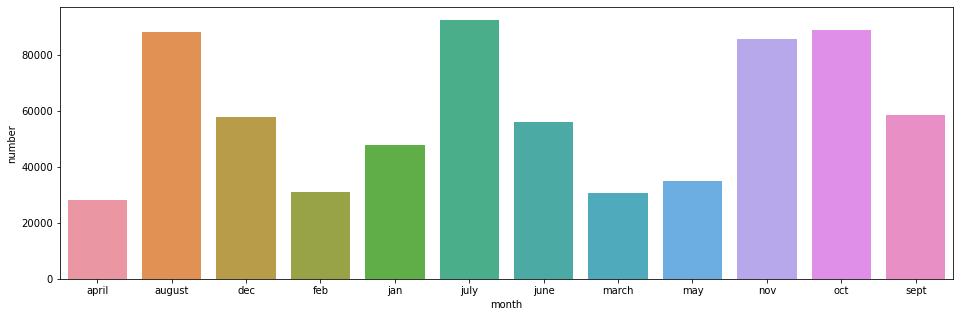

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(x='month',y='number',data=data1)


### in which year max forest fire

In [30]:
## groupby year 
data2=data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


<AxesSubplot:xlabel='year', ylabel='number'>

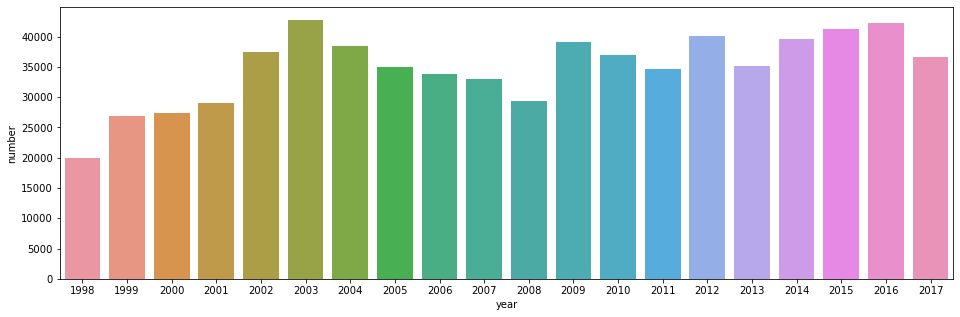

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data2)


### in which state maximum

In [32]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [33]:
## groupby 
data3=data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<AxesSubplot:xlabel='number', ylabel='state'>

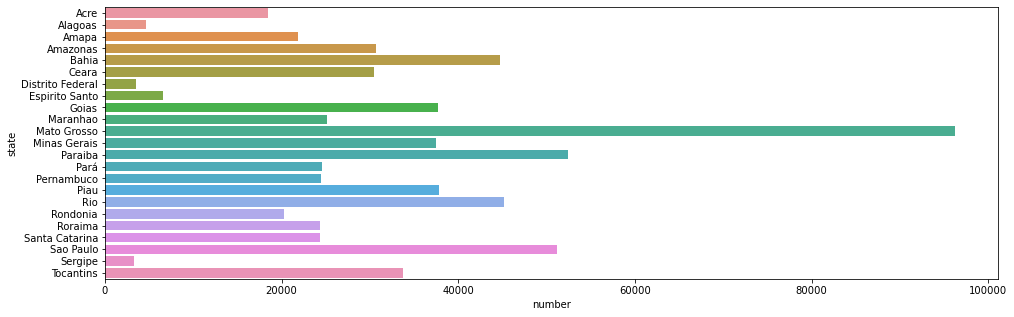

In [36]:
plt.figure(figsize=(16,5))
sns.barplot(x='number',y='state',data=data3)


### total number of fires were reported in amazons

In [38]:
data[data['state']=='Amazonas']['number'].sum()

30650.129

In [41]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [43]:
data4=data[data['state']=='Amazonas']
data5=data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

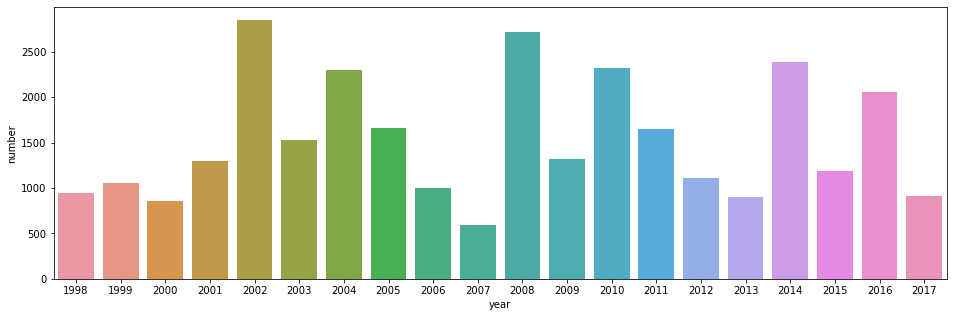

In [47]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=data5)

### day wise fire

In [48]:
data6=data[data['state']=='Amazonas']
data6

,year,state,month,number,date
718,1998,Amazonas,jan,0.0,1998-01-01
719,1999,Amazonas,jan,3.0,1999-01-01
720,2000,Amazonas,jan,7.0,2000-01-01
721,2001,Amazonas,jan,3.0,2001-01-01
722,2002,Amazonas,jan,17.0,2002-01-01
...,...,...,...,...,...
952,2012,Amazonas,dec,80.0,2012-01-01
953,2013,Amazonas,dec,236.0,2013-01-01
954,2014,Amazonas,dec,293.0,2014-01-01
955,2015,Amazonas,dec,565.0,2015-01-01


In [58]:
day=data6.groupby(data6['date'].dt.dayofweek).sum().number

import calendar
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

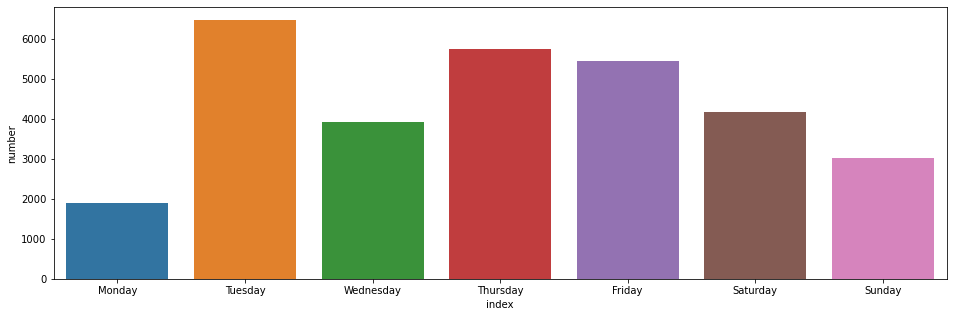

In [59]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)

###  2015 month wise data 

In [60]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [61]:
fire=data[data['year']==2015].groupby('month')['number'].sum().reset_index()
fire

,month,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


<AxesSubplot:xlabel='month', ylabel='number'>

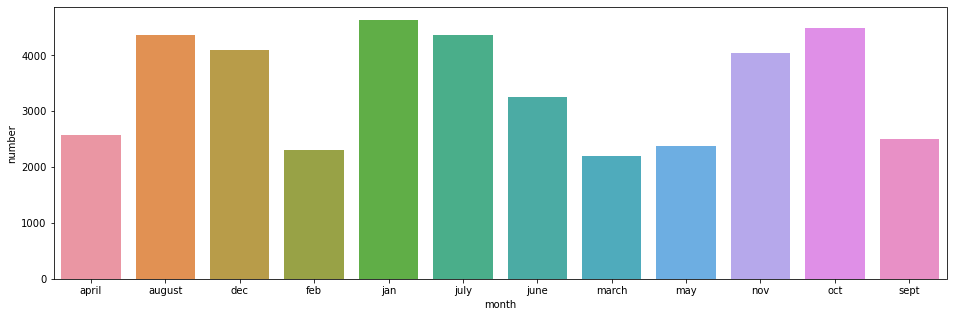

In [62]:
plt.figure(figsize=(16,5))
sns.barplot(x='month',y="number",data=fire)

### find the avg fire were listed highest to lowest

In [64]:
data8=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


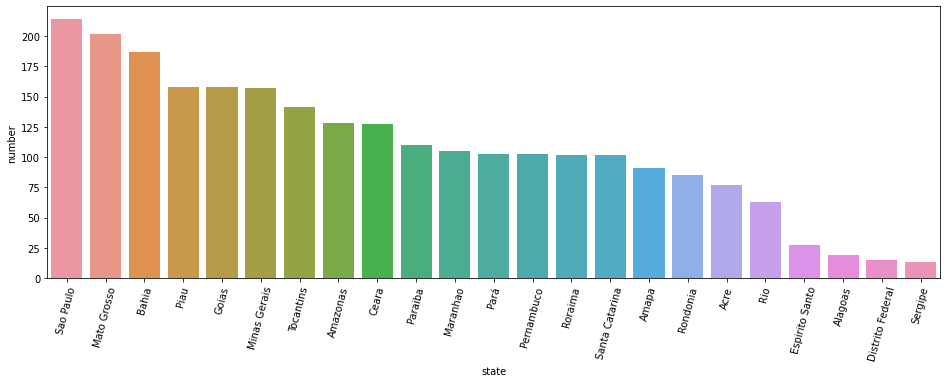

In [65]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y="number",data=data8)
plt.xticks(rotation=75)
plt.show()

### to find the state names where fires were reported in dec 

In [67]:
data9=data[data['month']=='dec']['state'].unique()
data9

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)